In [400]:
#importing required libraries

import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [401]:
#Loading data into dataframe

data = pd.read_csv("phishing1.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [402]:
#Shape of dataframe
data.shape

(10001, 32)

In [403]:
#Listing the features of the dataset

data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [404]:
#Information about the dataset
data = data.drop(['Index'],axis = 1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   UsingIP              10001 non-null  int64
 1   LongURL              10001 non-null  int64
 2   ShortURL             10001 non-null  int64
 3   Symbol@              10001 non-null  int64
 4   Redirecting//        10001 non-null  int64
 5   PrefixSuffix-        10001 non-null  int64
 6   SubDomains           10001 non-null  int64
 7   HTTPS                10001 non-null  int64
 8   DomainRegLen         10001 non-null  int64
 9   Favicon              10001 non-null  int64
 10  NonStdPort           10001 non-null  int64
 11  HTTPSDomainURL       10001 non-null  int64
 12  RequestURL           10001 non-null  int64
 13  AnchorURL            10001 non-null  int64
 14  LinksInScriptTags    10001 non-null  int64
 15  ServerFormHandler    10001 non-null  int64
 16  InfoEmail            1

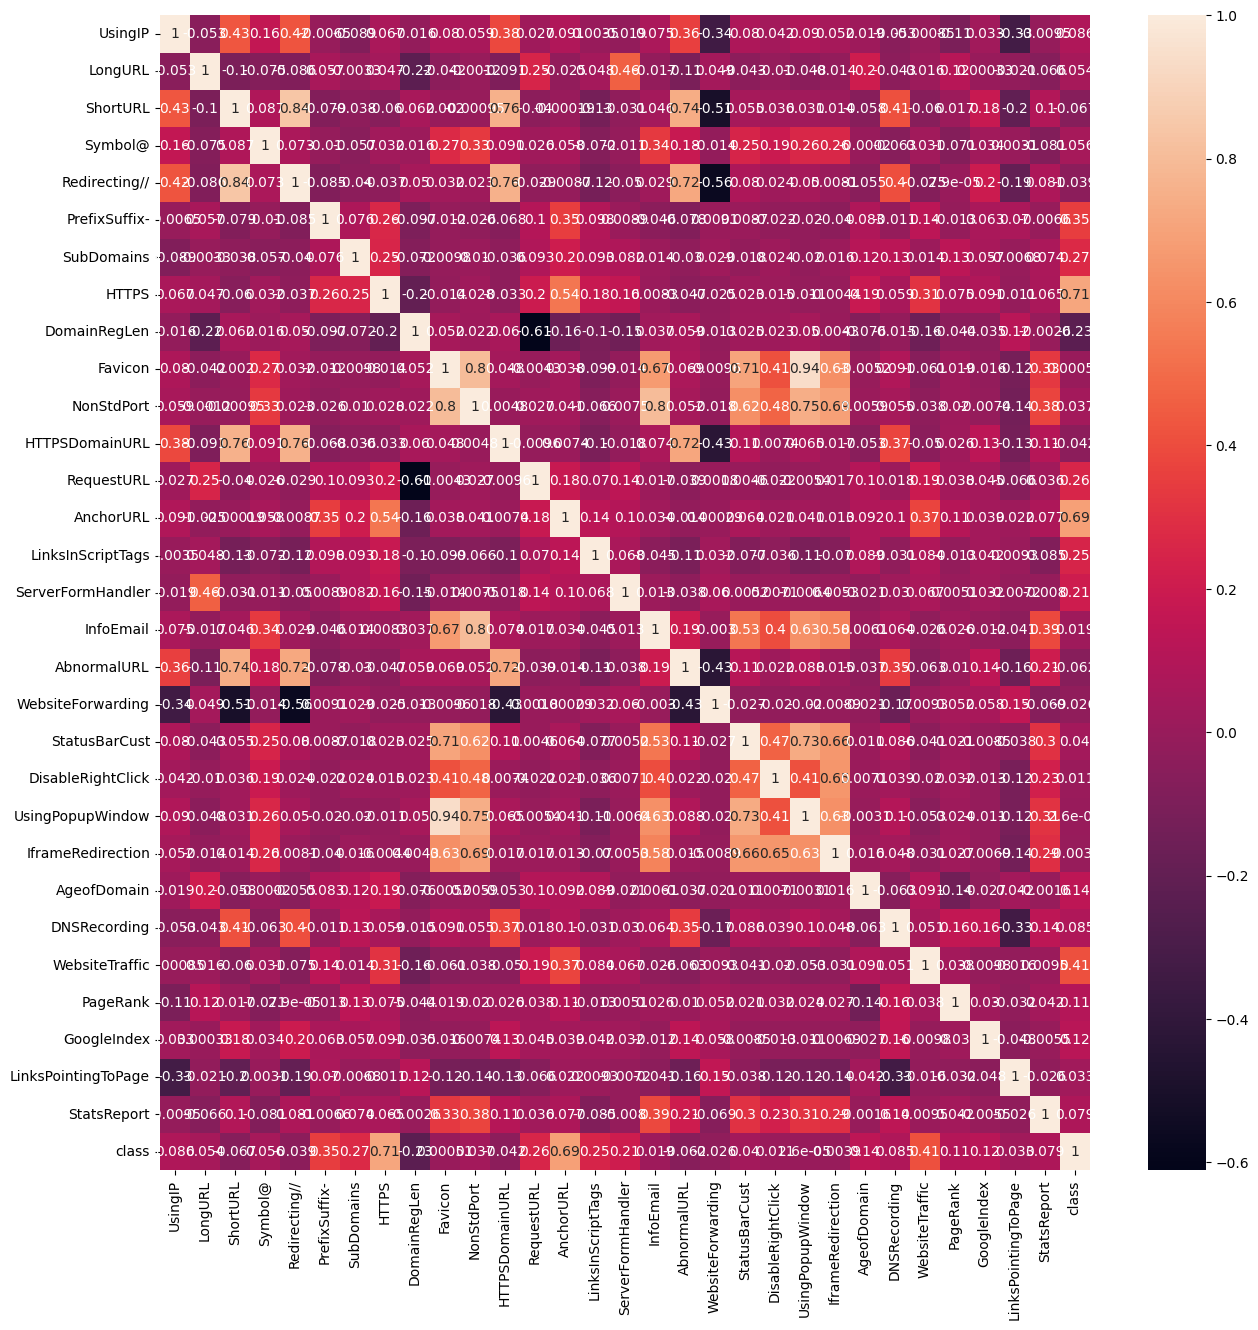

In [405]:
#Correlation heatmap

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

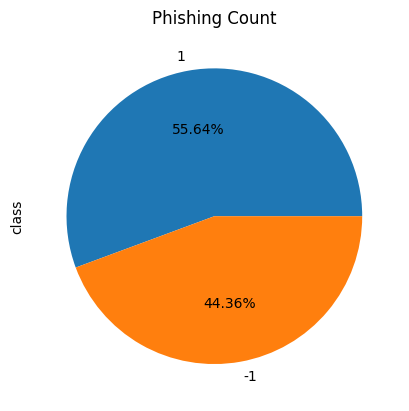

In [406]:
# Phishing Count in pie chart

data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

In [407]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["class"],axis =1)
y = data["class"]

In [408]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8000, 30), (8000,), (2001, 30), (2001,))

In [409]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a, b, c, d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))
  

## Decision Trees : Classifier



In [410]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [411]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [412]:
acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))


Decision Tree : Accuracy on training Data: 0.992
Decision Tree : Accuracy on test Data: 0.957
Decision Tree : f1_score on training Data: 0.992
Decision Tree : f1_score on test Data: 0.960

Decision Tree : Recall on training Data: 0.992
Decision Tree : Recall on test Data: 0.958

Decision Tree : precision on training Data: 0.993
Decision Tree : precision on test Data: 0.961


In [413]:
print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       918
           1       0.96      0.96      0.96      1083

    accuracy                           0.96      2001
   macro avg       0.96      0.96      0.96      2001
weighted avg       0.96      0.96      0.96      2001



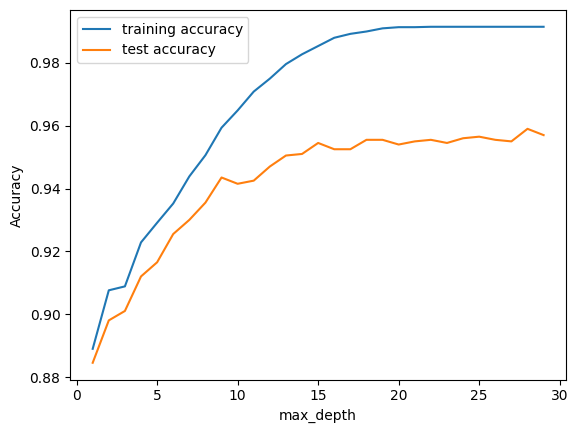

In [414]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();


In [415]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,recall_score_test_tree,precision_score_test_tree)

## Random Forest

In [416]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()


Random Forest : Accuracy on training Data: 0.991
Random Forest : Accuracy on test Data: 0.966



In [417]:
f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : f1_score on training Data: 0.992
Random Forest : f1_score on test Data: 0.968

Random Forest : Recall on training Data: 0.994
Random Forest : Recall on test Data: 0.975

Random Forest : precision on training Data: 0.990
Random Forest : precision on test Data: 0.961


In [418]:
print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

          -1       0.97      0.95      0.96       918
           1       0.96      0.98      0.97      1083

    accuracy                           0.97      2001
   macro avg       0.97      0.96      0.97      2001
weighted avg       0.97      0.97      0.97      2001



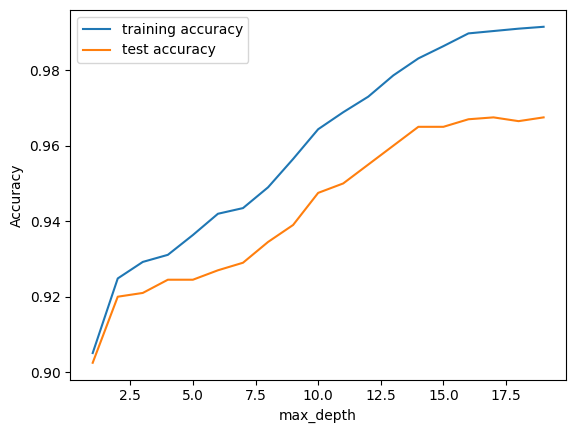

In [419]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(max_depth=n)

    forest_test.fit(X_train, y_train) 
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [420]:
#Storing results

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,recall_score_test_forest,precision_score_test_forest)

## LightGBM

In [421]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(X_train,y_train)

y_train_lgb =lgb.predict(X_train)
y_test_lgb = lgb.predict(X_test)

acc_train_lgb = metrics.accuracy_score(y_train,y_train_lgb)
acc_test_lgb = metrics.accuracy_score(y_test,y_test_lgb)

print("LightGBM : Accuracy on training data : {:.3f}".format(acc_train_lgb))
print("LightGBM : Accuracy on test data : {:.3f}".format(acc_test_lgb))

f1_score_train_lgb= metrics.f1_score(y_train,y_train_lgb)
f1_score_test_lgb = metrics.f1_score(y_test,y_test_lgb)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_lgb))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_lgb))
print()

recall_score_train_lgb = metrics.recall_score(y_train,y_train_lgb)
recall_score_test_lgb = metrics.recall_score(y_test,y_test_lgb)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_lgb))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_lgb))
print()

precision_score_train_lgb = metrics.precision_score(y_train,y_train_lgb)
precision_score_test_lgb = metrics.precision_score(y_test,y_test_lgb)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_lgb))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_lgb))

LightGBM : Accuracy on training data : 0.982
LightGBM : Accuracy on test data : 0.960
Logistic Regression : f1_score on training Data: 0.984
Logistic Regression : f1_score on test Data: 0.963

Logistic Regression : Recall on training Data: 0.985
Logistic Regression : Recall on test Data: 0.965

Logistic Regression : precision on training Data: 0.982
Logistic Regression : precision on test Data: 0.961


In [422]:
print(metrics.classification_report(y_test, y_test_lgb))

              precision    recall  f1-score   support

          -1       0.96      0.95      0.96       918
           1       0.96      0.96      0.96      1083

    accuracy                           0.96      2001
   macro avg       0.96      0.96      0.96      2001
weighted avg       0.96      0.96      0.96      2001



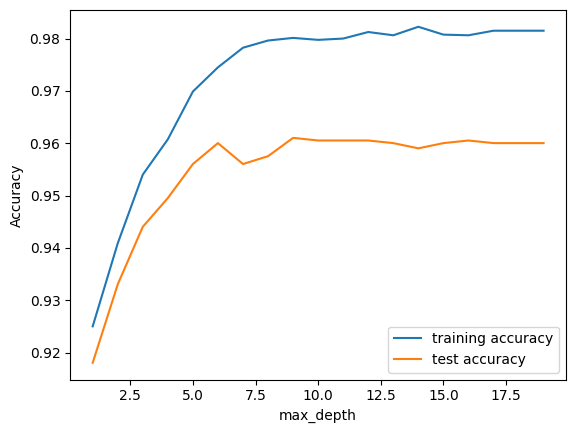

In [423]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    lgb_test =  LGBMClassifier(max_depth=n)

    lgb_test.fit(X_train, y_train) 
    # record training set accuracy
    training_accuracy.append(lgb_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(lgb_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [424]:
storeResults('LightGBM',acc_test_lgb,f1_score_test_lgb,recall_score_test_lgb,precision_score_test_lgb)

## Logistic Regression

In [425]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()
f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.930
Logistic Regression : Accuracy on test Data: 0.921

Logistic Regression : f1_score on training Data: 0.938
Logistic Regression : f1_score on test Data: 0.928

Logistic Regression : Recall on training Data: 0.947
Logistic Regression : Recall on test Data: 0.935

Logistic Regression : precision on training Data: 0.929
Logistic Regression : precision on test Data: 0.920


In [426]:
print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

          -1       0.92      0.90      0.91       918
           1       0.92      0.94      0.93      1083

    accuracy                           0.92      2001
   macro avg       0.92      0.92      0.92      2001
weighted avg       0.92      0.92      0.92      2001



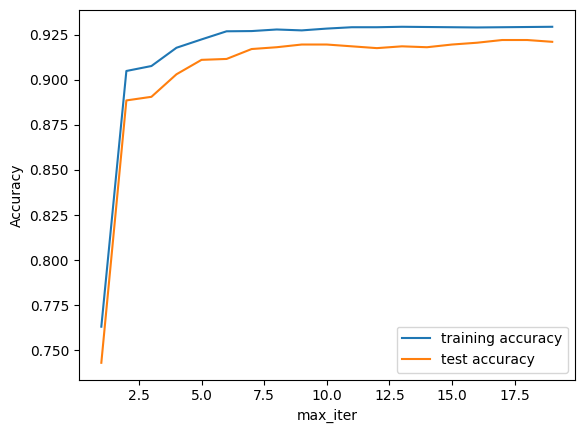

In [427]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    log_test =  LogisticRegression(max_iter=n)

    log_test.fit(X_train, y_train) 
    # record training set accuracy
    training_accuracy.append(log_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(log_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_iter")
plt.legend();

In [428]:
storeResults('Logistic Regression',acc_test_log,f1_score_test_log,recall_score_train_log,precision_score_train_log)

## Support Vector Machine

In [429]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)

y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)


acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()
f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))


Support Vector Machine : Accuracy on training Data: 0.969
Support Vector Machine : Accuracy on test Data: 0.955

Support Vector Machine : f1_score on training Data: 0.972
Support Vector Machine : f1_score on test Data: 0.958

Support Vector Machine : Recall on training Data: 0.980
Support Vector Machine : Recall on test Data: 0.966

Support Vector Machine : precision on training Data: 0.964
Support Vector Machine : precision on test Data: 0.951


In [430]:
print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.96      0.94      0.95       918
           1       0.95      0.97      0.96      1083

    accuracy                           0.95      2001
   macro avg       0.95      0.95      0.95      2001
weighted avg       0.95      0.95      0.95      2001



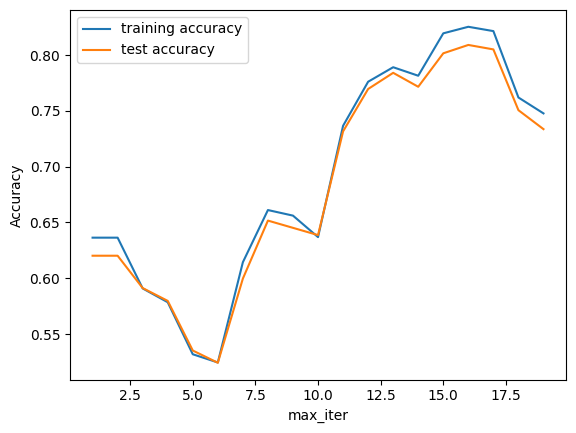

In [431]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    svc_test =  SVC(max_iter=n)

    svc_test.fit(X_train, y_train) 
    # record training set accuracy
    training_accuracy.append(svc_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(svc_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_iter")
plt.legend();

In [432]:
storeResults('Suport Vector Machine',acc_test_svc,f1_score_test_svc,recall_score_train_svc,precision_score_train_svc)

## Gradient Boosting

In [433]:
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

Gradient Boosting Classifier : Accuracy on training Data: 0.990
Gradient Boosting Classifier : Accuracy on test Data: 0.966



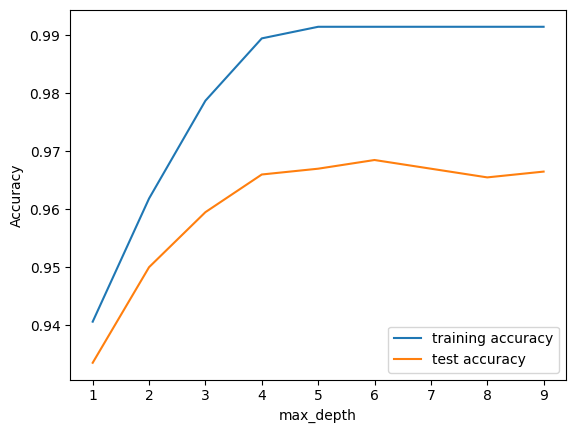

In [434]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    gbc_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    gbc_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(gbc_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(gbc_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

## Comparision of Models


In [435]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })
result
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy','f1_score'],ascending=False).reset_index(drop=True)
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Random Forest,0.966,0.968,0.975,0.961
1,LightGBM,0.960,0.963,0.965,0.961
2,Decision Tree,0.957,0.960,0.958,0.961
3,Suport Vector Machine,0.955,0.958,0.980,0.964
4,Logistic Regression,0.921,0.928,0.947,0.929


In [436]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Decision Tree,0.957,0.960,0.958,0.961
1,Random Forest,0.966,0.968,0.975,0.961
2,LightGBM,0.960,0.963,0.965,0.961
3,Logistic Regression,0.921,0.928,0.947,0.929
4,Suport Vector Machine,0.955,0.958,0.980,0.964


In [437]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy'],ascending=False).reset_index(drop=True)

In [438]:
# dispalying total result
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Random Forest,0.966,0.968,0.975,0.961
1,LightGBM,0.960,0.963,0.965,0.961
2,Decision Tree,0.957,0.960,0.958,0.961
3,Suport Vector Machine,0.955,0.958,0.980,0.964
4,Logistic Regression,0.921,0.928,0.947,0.929


In [439]:


# instantiate the model
forest1 = RandomForestClassifier()

 


In [440]:
# Creating holders to store the model performance results
ML_Model1 = []
accuracy1 = []
f1_score1 = []
recall1 = []
precision1 = []

#function to call for storing the results
def storeResults1(model, a,b,c,d):
  ML_Model1.append(model)
  accuracy1.append(round(a, 3))
  f1_score1.append(round(b, 3))
  recall1.append(round(c, 3))
  precision1.append(round(d, 3))
  

## Random Forest Classifier Feature Importance

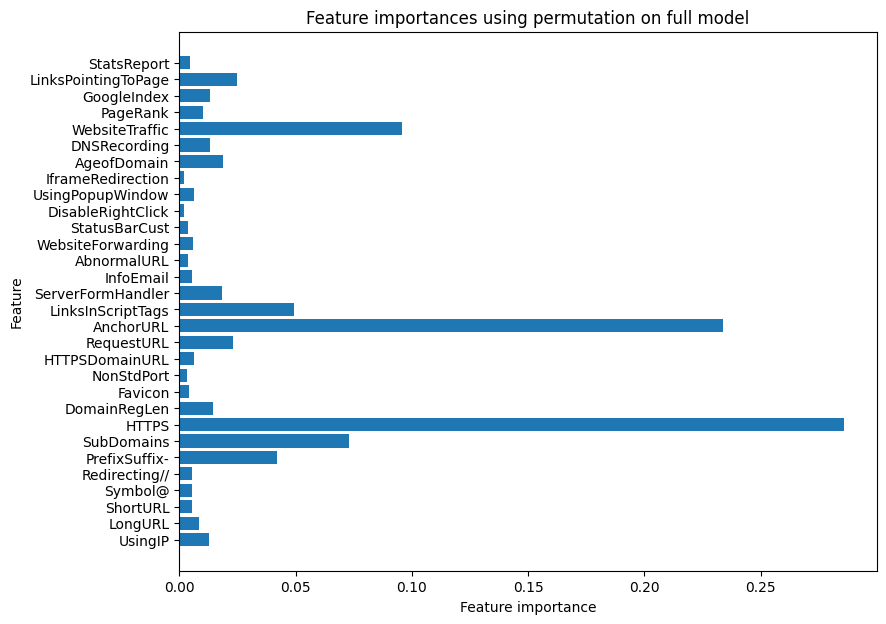

In [441]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## Random Forest Classifier With Sequential Feature Selector

In [442]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest2 = RandomForestClassifier()

In [443]:
from sklearn.feature_selection import SequentialFeatureSelector
sfsforest = SequentialFeatureSelector(forest2,n_features_to_select=20)
sfsforest.fit(X_train,y_train)

SequentialFeatureSelector(estimator=RandomForestClassifier(),
                          n_features_to_select=20)

In [444]:
sfsforest.get_support()

array([ True,  True,  True, False, False,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True, False])

In [445]:
X.columns.values[sfsforest.get_support()]

array(['UsingIP', 'LongURL', 'ShortURL', 'PrefixSuffix-', 'SubDomains',
       'HTTPS', 'DomainRegLen', 'HTTPSDomainURL', 'RequestURL',
       'AnchorURL', 'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail',
       'AbnormalURL', 'AgeofDomain', 'DNSRecording', 'WebsiteTraffic',
       'PageRank', 'GoogleIndex', 'LinksPointingToPage'], dtype=object)

In [446]:
finalsfs=sfsforest.transform(X)
import numpy as np
import pandas as pd


df = pd.DataFrame(finalsfs, columns =X.columns.values[sfsforest.get_support()])


df.head()



,UsingIP,LongURL,ShortURL,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,HTTPSDomainURL,RequestURL,AnchorURL,LinksInScriptTags,ServerFormHandler,InfoEmail,AbnormalURL,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage
0,1,1,1,-1,0,1,-1,-1,1,0,-1,-1,1,1,-1,-1,0,-1,1,1
1,1,0,1,-1,-1,-1,-1,-1,1,0,-1,-1,-1,-1,1,-1,1,-1,1,0
2,1,0,1,-1,-1,-1,1,-1,-1,0,0,-1,1,1,-1,-1,1,-1,1,-1
3,1,0,-1,-1,1,1,-1,1,1,0,0,-1,1,1,-1,-1,0,-1,1,1
4,-1,0,-1,-1,1,1,-1,-1,1,0,0,-1,-1,-1,1,1,1,-1,1,-1


In [447]:
df.shape

(10001, 20)

In [448]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(df, y, test_size = 0.2, random_state = 42)
X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape

((8000, 20), (8000,), (2001, 20), (2001,))

In [449]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest2 = RandomForestClassifier()

# fit the model 
forest2.fit(X_train1,y_train1)

#predicting the target value from the model for the samples
y_train_forest = forest2.predict(X_train1)
y_test_forest = forest2.predict(X_test1)

#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train1,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test1,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))


Random Forest : Accuracy on training Data: 0.990
Random Forest : Accuracy on test Data: 0.968

Random Forest : f1_score on training Data: 0.991
Random Forest : f1_score on test Data: 0.970

Random Forest : Recall on training Data: 0.995
Random Forest : Recall on test Data: 0.977

Random Forest : precision on training Data: 0.988
Random Forest : precision on test Data: 0.961


In [450]:
storeResults1('Random Forest',acc_test_forest,f1_score_test_forest,recall_score_train_forest,precision_score_train_forest)

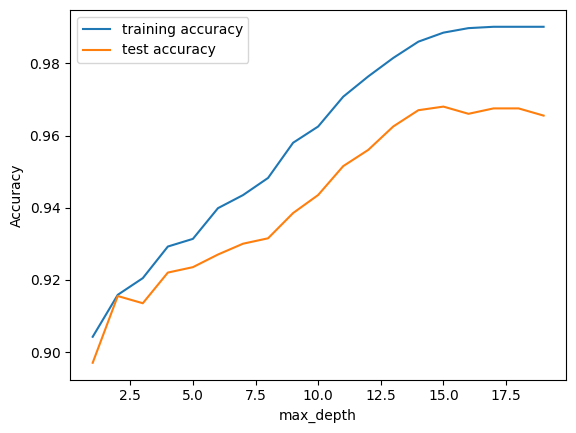

In [451]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(max_depth=n)

    forest_test.fit(X_train1, y_train1) 
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train1, y_train1))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test1, y_test1))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

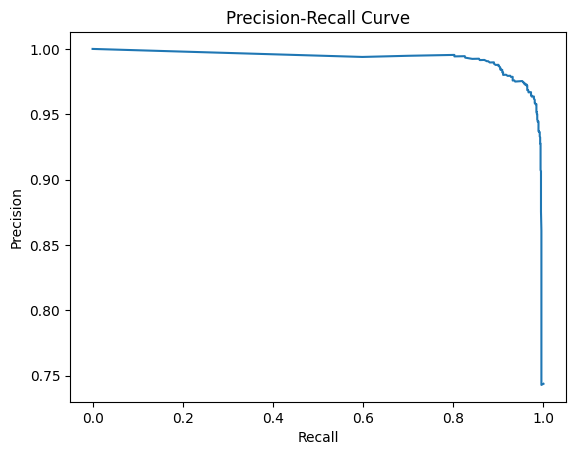

In [452]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve
ypredprob=forest2.predict_proba(X_test1)[:,1]
precision,recall,_=precision_recall_curve(y_test1,ypredprob)
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [453]:
import pickle

# dump information to that file
pickle.dump(forest2, open('model1.pkl', 'wb'))

## Decision Tree Feature Importance

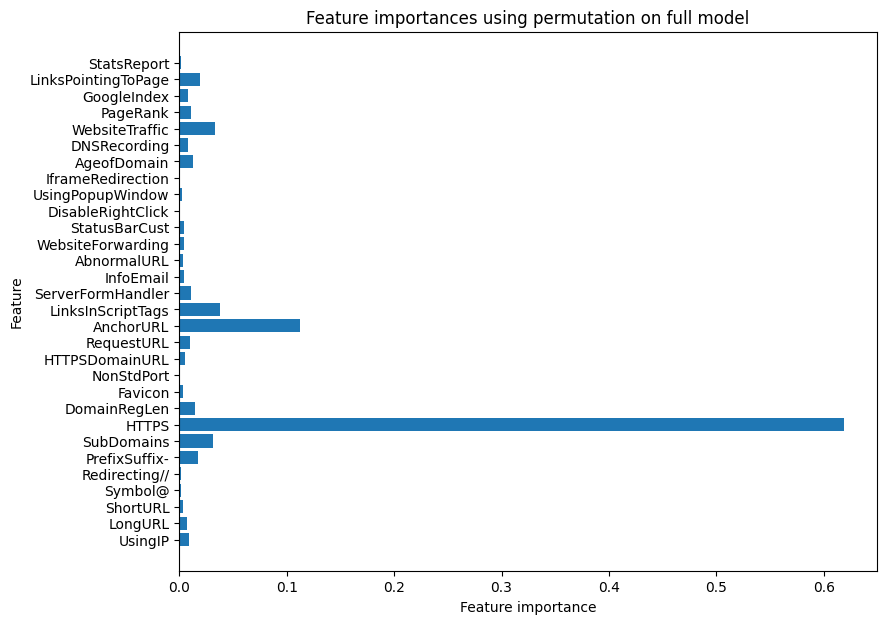

In [454]:
  #checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## Decision Tree with Sequential Feature Selector

In [455]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree1 = DecisionTreeClassifier(max_depth=30)

In [456]:
from sklearn.feature_selection import SequentialFeatureSelector
sfstree = SequentialFeatureSelector(tree1,n_features_to_select=20)
sfstree.fit(X_train,y_train)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(max_depth=30),
                          n_features_to_select=20)

In [457]:
sfstree.get_support()

array([False,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True, False,  True,  True, False,  True,  True,
       False, False,  True,  True,  True, False,  True,  True, False,
       False,  True,  True])

In [458]:
X.columns.values[sfstree.get_support()]

array(['LongURL', 'ShortURL', 'Symbol@', 'Redirecting//', 'PrefixSuffix-',
       'SubDomains', 'HTTPS', 'NonStdPort', 'HTTPSDomainURL', 'AnchorURL',
       'LinksInScriptTags', 'InfoEmail', 'AbnormalURL',
       'DisableRightClick', 'UsingPopupWindow', 'IframeRedirection',
       'DNSRecording', 'WebsiteTraffic', 'LinksPointingToPage',
       'StatsReport'], dtype=object)

In [459]:
finalsfs1=sfstree.transform(X)
import numpy as np
import pandas as pd

df1 = pd.DataFrame(finalsfs1, columns = X.columns.values[sfstree.get_support()])



#df = pd.DataFrame(finalsfs, columns = ['PrefixSuffix-', 'SubDomains', 'HTTPS', 'RequestURL', 'AnchorURL',
       #'LinksInScriptTags', 'WebsiteTraffic', 'LinksPointingToPage'])

df1.head()

,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,NonStdPort,HTTPSDomainURL,AnchorURL,LinksInScriptTags,InfoEmail,AbnormalURL,DisableRightClick,UsingPopupWindow,IframeRedirection,DNSRecording,WebsiteTraffic,LinksPointingToPage,StatsReport
0,1,1,1,1,-1,0,1,1,-1,0,-1,1,1,1,1,1,-1,0,1,1
1,0,1,1,1,-1,-1,-1,1,-1,0,-1,-1,-1,1,1,1,-1,1,0,-1
2,0,1,1,1,-1,-1,-1,1,-1,0,0,1,1,1,1,1,-1,1,-1,1
3,0,-1,1,1,-1,1,1,1,1,0,0,1,1,1,-1,1,-1,0,1,1
4,0,-1,1,-1,-1,1,1,1,-1,0,0,-1,-1,1,1,1,1,1,-1,-1


In [460]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(df1, y, test_size = 0.2, random_state = 42)
X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape

((8000, 20), (8000,), (2001, 20), (2001,))

In [461]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train2, y_train2)

#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train2)
y_test_tree = tree.predict(X_test2)

acc_train_tree = metrics.accuracy_score(y_train2,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test2,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()
f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.972
Decision Tree : Accuracy on test Data: 0.948

Decision Tree : f1_score on training Data: 0.975
Decision Tree : f1_score on test Data: 0.952

Decision Tree : Recall on training Data: 0.979
Decision Tree : Recall on test Data: 0.958

Decision Tree : precision on training Data: 0.972
Decision Tree : precision on test Data: 0.946


In [462]:
storeResults1('Decision Tree',acc_test_tree,f1_score_test_tree,recall_score_train_tree,precision_score_train_tree)

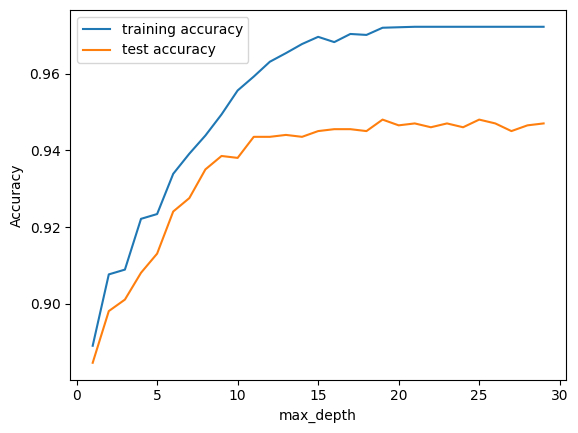

In [463]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train2, y_train2)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train2, y_train2))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test2, y_test2))
#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

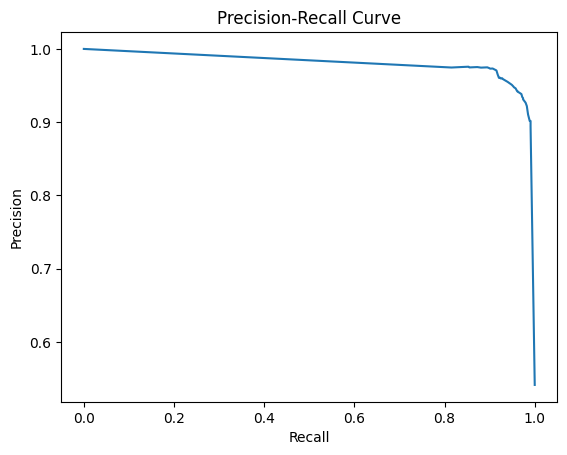

In [464]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve
ypredprob=tree.predict_proba(X_test2)[:,1]
precision,recall,_=precision_recall_curve(y_test2,ypredprob)
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## LightGBM feature Importance

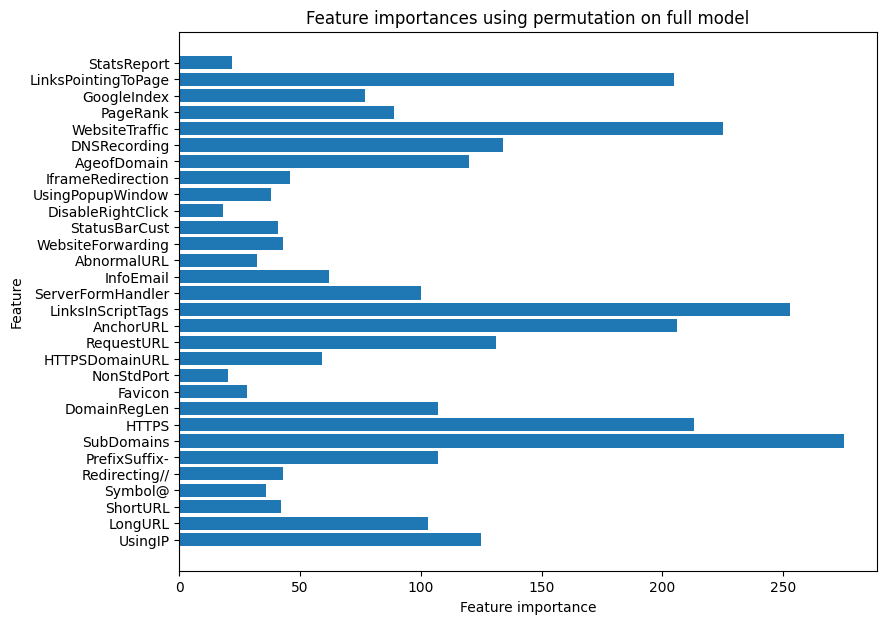

In [465]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), lgb.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## LightGBM with Sequential Feature Selector

In [466]:
from lightgbm import LGBMClassifier
lgb1 = LGBMClassifier()

In [467]:
from sklearn.feature_selection import SequentialFeatureSelector
sfslgb = SequentialFeatureSelector(lgb1,n_features_to_select=20)
sfslgb.fit(X_train,y_train)

SequentialFeatureSelector(estimator=LGBMClassifier(), n_features_to_select=20)

In [468]:
sfslgb.get_support()

array([ True,  True,  True, False, False,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False, False,  True, False,  True,  True,  True,  True,  True,
       False,  True, False])

In [469]:
X.columns.values[sfslgb.get_support()]

array(['UsingIP', 'LongURL', 'ShortURL', 'PrefixSuffix-', 'SubDomains',
       'HTTPS', 'Favicon', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail',
       'DisableRightClick', 'IframeRedirection', 'AgeofDomain',
       'DNSRecording', 'WebsiteTraffic', 'PageRank',
       'LinksPointingToPage'], dtype=object)

In [470]:
finalsfs2=sfslgb.transform(X)
import numpy as np
import pandas as pd

df2 = pd.DataFrame(finalsfs1, columns = X.columns.values[sfslgb.get_support()])

df2.head()

,UsingIP,LongURL,ShortURL,PrefixSuffix-,SubDomains,HTTPS,Favicon,HTTPSDomainURL,RequestURL,AnchorURL,LinksInScriptTags,ServerFormHandler,InfoEmail,DisableRightClick,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,LinksPointingToPage
0,1,1,1,1,-1,0,1,1,-1,0,-1,1,1,1,1,1,-1,0,1,1
1,0,1,1,1,-1,-1,-1,1,-1,0,-1,-1,-1,1,1,1,-1,1,0,-1
2,0,1,1,1,-1,-1,-1,1,-1,0,0,1,1,1,1,1,-1,1,-1,1
3,0,-1,1,1,-1,1,1,1,1,0,0,1,1,1,-1,1,-1,0,1,1
4,0,-1,1,-1,-1,1,1,1,-1,0,0,-1,-1,1,1,1,1,1,-1,-1


In [471]:
from sklearn.model_selection import train_test_split

X_train3, X_test3, y_train3, y_test3 = train_test_split(df2, y, test_size = 0.2, random_state = 42)
X_train3.shape, y_train3.shape, X_test3.shape, y_test3.shape

((8000, 20), (8000,), (2001, 20), (2001,))

In [472]:
from lightgbm import LGBMClassifier
lgb2 = LGBMClassifier()
lgb2.fit(X_train3,y_train3)

y_train_lgb =lgb2.predict(X_train3)
y_test_lgb = lgb2.predict(X_test3)

acc_train_lgb = metrics.accuracy_score(y_train3,y_train_lgb)
acc_test_lgb = metrics.accuracy_score(y_test3,y_test_lgb)

print("LightGBM : Accuracy on training data : {:.3f}".format(acc_train_lgb))
print("LightGBM : Accuracy on test data : {:.3f}".format(acc_test_lgb))
print()
f1_score_train_lgb= metrics.f1_score(y_train,y_train_lgb)
f1_score_test_lgb = metrics.f1_score(y_test,y_test_lgb)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_lgb))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_lgb))
print()

recall_score_train_lgb = metrics.recall_score(y_train,y_train_lgb)
recall_score_test_lgb = metrics.recall_score(y_test,y_test_lgb)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_lgb))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_lgb))
print()

precision_score_train_lgb = metrics.precision_score(y_train,y_train_lgb)
precision_score_test_lgb = metrics.precision_score(y_test,y_test_lgb)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_lgb))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_lgb))

LightGBM : Accuracy on training data : 0.967
LightGBM : Accuracy on test data : 0.948

Logistic Regression : f1_score on training Data: 0.971
Logistic Regression : f1_score on test Data: 0.952

Logistic Regression : Recall on training Data: 0.971
Logistic Regression : Recall on test Data: 0.951

Logistic Regression : precision on training Data: 0.971
Logistic Regression : precision on test Data: 0.953


In [473]:
storeResults1('LightGBM',acc_test_lgb,f1_score_test_lgb,recall_score_train_lgb,precision_score_train_lgb)

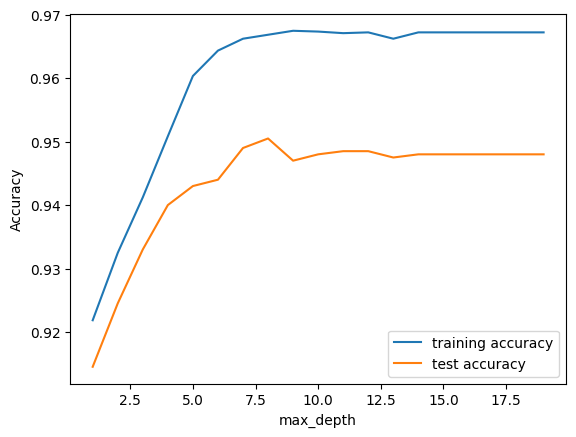

In [474]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    lgb_test =  LGBMClassifier(max_depth=n)

    lgb_test.fit(X_train3, y_train3) 
    # record training set accuracy
    training_accuracy.append(lgb_test.score(X_train3, y_train3))
    # record generalization accuracy
    test_accuracy.append(lgb_test.score(X_test3, y_test3))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

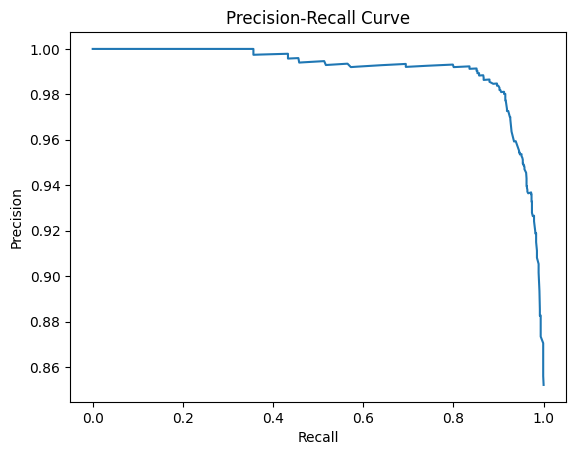

In [475]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve
ypredprob=lgb2.predict_proba(X_test3)[:,1]
precision,recall,_=precision_recall_curve(y_test3,ypredprob)
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## Logistic Regression Feature Importance

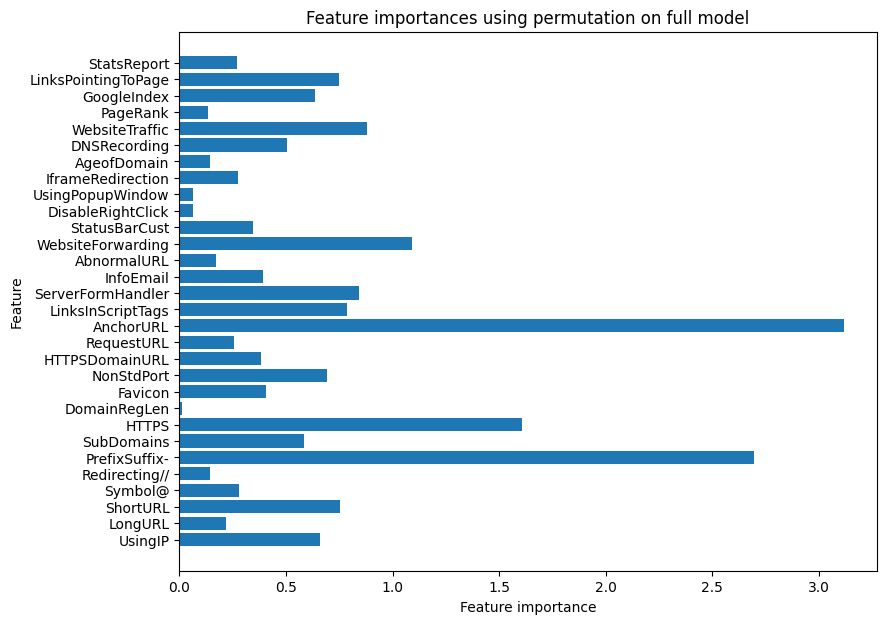

In [476]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), np.abs(log.coef_[0]), align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## Logistic Regression with Sequential Feature Selector

In [477]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log1 = LogisticRegression()

In [478]:
from sklearn.feature_selection import SequentialFeatureSelector
sfslog = SequentialFeatureSelector(log1,n_features_to_select=20)
sfslog.fit(X_train,y_train)

SequentialFeatureSelector(estimator=LogisticRegression(),
                          n_features_to_select=20)

In [479]:
sfslog.get_support()

array([False, False,  True, False,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
        True, False, False])

In [480]:
X.columns.values[sfslog.get_support()]

array(['ShortURL', 'Redirecting//', 'PrefixSuffix-', 'HTTPS',
       'DomainRegLen', 'Favicon', 'NonStdPort', 'HTTPSDomainURL',
       'AnchorURL', 'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail',
       'AbnormalURL', 'WebsiteForwarding', 'StatusBarCust',
       'DisableRightClick', 'UsingPopupWindow', 'WebsiteTraffic',
       'PageRank', 'GoogleIndex'], dtype=object)

In [481]:
finalsfs3=sfslog.transform(X)
import numpy as np
import pandas as pd

df3 = pd.DataFrame(finalsfs3, columns =X.columns.values[sfslog.get_support()])

df3.head()

,ShortURL,Redirecting//,PrefixSuffix-,HTTPS,DomainRegLen,Favicon,NonStdPort,HTTPSDomainURL,AnchorURL,LinksInScriptTags,ServerFormHandler,InfoEmail,AbnormalURL,WebsiteForwarding,StatusBarCust,DisableRightClick,UsingPopupWindow,WebsiteTraffic,PageRank,GoogleIndex
0,1,1,-1,1,-1,1,1,-1,0,-1,-1,1,1,0,1,1,1,0,-1,1
1,1,1,-1,-1,-1,1,1,-1,0,-1,-1,-1,-1,0,1,1,1,1,-1,1
2,1,1,-1,-1,1,1,1,-1,0,0,-1,1,1,0,1,1,1,1,-1,1
3,-1,1,-1,1,-1,1,1,1,0,0,-1,1,1,0,-1,1,-1,0,-1,1
4,-1,-1,-1,1,-1,1,1,-1,0,0,-1,-1,-1,0,1,1,1,1,-1,1


In [482]:
from sklearn.model_selection import train_test_split

X_train4, X_test4, y_train4, y_test4 = train_test_split(df3, y, test_size = 0.2, random_state = 42)
X_train4.shape, y_train4.shape, X_test4.shape, y_test4.shape

((8000, 20), (8000,), (2001, 20), (2001,))

In [483]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log2 = LogisticRegression()

# fit the model 
log2.fit(X_train4,y_train4)
#predicting the target value from the model for the samples

y_train_log = log2.predict(X_train4)
y_test_log = log2.predict(X_test4)

#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train4,y_train_log)
acc_test_log = metrics.accuracy_score(y_test4,y_test_log)

print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()
f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.924
Logistic Regression : Accuracy on test Data: 0.918

Logistic Regression : f1_score on training Data: 0.933
Logistic Regression : f1_score on test Data: 0.925

Logistic Regression : Recall on training Data: 0.945
Logistic Regression : Recall on test Data: 0.935

Logistic Regression : precision on training Data: 0.921
Logistic Regression : precision on test Data: 0.914


In [484]:
storeResults1('Logistic Regression',acc_test_log,f1_score_test_log,recall_score_train_log,precision_score_train_log)

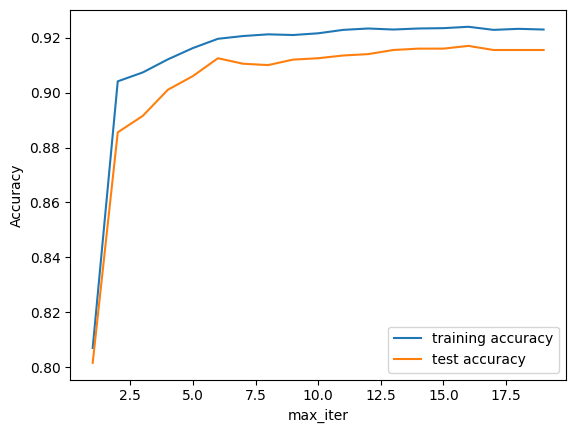

In [485]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    log_test =  LogisticRegression(max_iter=n)

    log_test.fit(X_train4, y_train4) 
    # record training set accuracy
    training_accuracy.append(log_test.score(X_train4, y_train4))
    # record generalization accuracy
    test_accuracy.append(log_test.score(X_test4, y_test4))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_iter")
plt.legend();

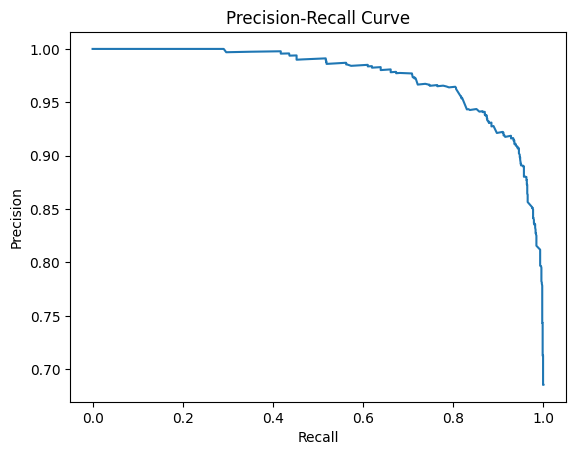

In [486]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve
ypredprob=log2.predict_proba(X_test4)[:,1]
precision,recall,_=precision_recall_curve(y_test4,ypredprob)
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## Support Vector Machine Feature Importance

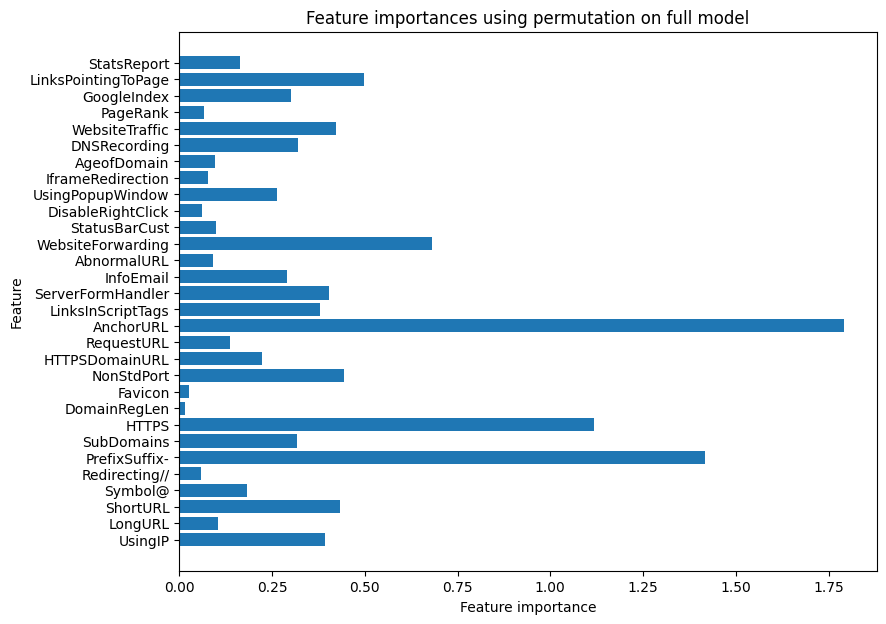

In [487]:
#checking the feature improtance in the model
modell=SVC(kernel='linear')
modell.fit(X_train,y_train)
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), np.abs(modell.coef_[0]), align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## Support Vector Machine with Sequential Feature Selector

In [488]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
svc1=SVC(kernel='linear')

# fitting the model for grid search


In [489]:
from sklearn.feature_selection import SequentialFeatureSelector
sfssvc = SequentialFeatureSelector(svc1,n_features_to_select= 20)
sfssvc.fit(X_train,y_train)                                                                                                                             

SequentialFeatureSelector(estimator=SVC(kernel='linear'),
                          n_features_to_select=20)

In [490]:
sfssvc.get_support()

array([ True, False,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True, False, False, False,  True, False,  True,  True, False,
        True,  True, False])

In [491]:
X.columns.values[sfssvc.get_support()]

array(['UsingIP', 'ShortURL', 'Symbol@', 'PrefixSuffix-', 'SubDomains',
       'HTTPS', 'DomainRegLen', 'NonStdPort', 'HTTPSDomainURL',
       'RequestURL', 'AnchorURL', 'LinksInScriptTags',
       'ServerFormHandler', 'AbnormalURL', 'WebsiteForwarding',
       'IframeRedirection', 'DNSRecording', 'WebsiteTraffic',
       'GoogleIndex', 'LinksPointingToPage'], dtype=object)

In [492]:
finalsfs4=sfssvc.transform(X)
import numpy as np
import pandas as pd

df4 = pd.DataFrame(finalsfs4, columns = X.columns.values[sfssvc.get_support()])

df4.head()

,UsingIP,ShortURL,Symbol@,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,NonStdPort,HTTPSDomainURL,RequestURL,AnchorURL,LinksInScriptTags,ServerFormHandler,AbnormalURL,WebsiteForwarding,IframeRedirection,DNSRecording,WebsiteTraffic,GoogleIndex,LinksPointingToPage
0,1,1,1,-1,0,1,-1,1,-1,1,0,-1,-1,1,0,1,-1,0,1,1
1,1,1,1,-1,-1,-1,-1,1,-1,1,0,-1,-1,-1,0,1,-1,1,1,0
2,1,1,1,-1,-1,-1,1,1,-1,-1,0,0,-1,1,0,1,-1,1,1,-1
3,1,-1,1,-1,1,1,-1,1,1,1,0,0,-1,1,0,1,-1,0,1,1
4,-1,-1,1,-1,1,1,-1,1,-1,1,0,0,-1,-1,0,1,1,1,1,-1


In [493]:
from sklearn.model_selection import train_test_split

X_train5, X_test5, y_train5, y_test5 = train_test_split(df4, y, test_size = 0.2, random_state = 42)
X_train5.shape, y_train5.shape, X_test5.shape, y_test5.shape

((8000, 20), (8000,), (2001, 20), (2001,))

In [494]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train5, y_train5)
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train5)
y_test_svc = svc.predict(X_test5)

#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train5,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test5,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()
f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.959
Support Vector Machine : Accuracy on test Data: 0.942

Support Vector Machine : f1_score on training Data: 0.964
Support Vector Machine : f1_score on test Data: 0.947

Support Vector Machine : Recall on training Data: 0.977
Support Vector Machine : Recall on test Data: 0.960

Support Vector Machine : precision on training Data: 0.951
Support Vector Machine : precision on test Data: 0.934


In [495]:
storeResults1('Support Vector Machine',acc_test_svc,f1_score_test_svc, recall_score_train_svc,precision_score_train_svc)

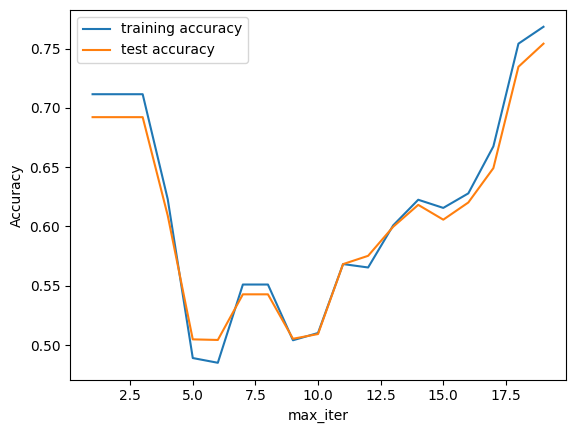

In [496]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    svc_test =  SVC(max_iter=n)

    svc_test.fit(X_train5, y_train5) 
    # record training set accuracy
    training_accuracy.append(svc_test.score(X_train5, y_train5))
    # record generalization accuracy
    test_accuracy.append(svc_test.score(X_test5, y_test5))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_iter")
plt.legend();

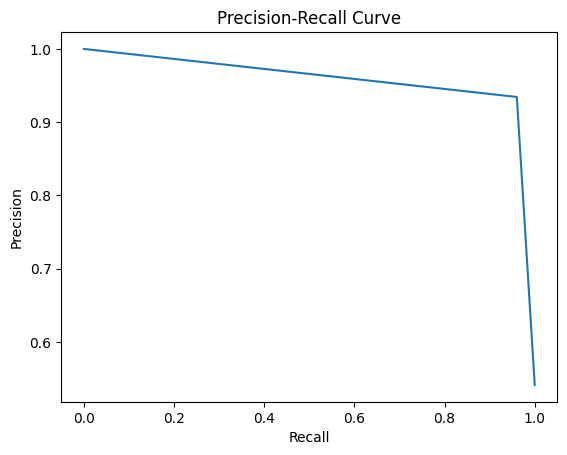

In [497]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve
ypredprob=svc.predict(X_test5)
precision,recall,_=precision_recall_curve(y_test5,ypredprob)
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [498]:
#creating dataframe
result1 = pd.DataFrame({ 'ML Model' : ML_Model1,
                        'Accuracy' : accuracy1,
                        'f1_score' : f1_score1,
                        'Recall'   : recall1,
                        'Precision': precision1,
                      })

In [499]:
result1

,ML Model,Accuracy,f1_score,Recall,Precision
0,Random Forest,0.968,0.970,0.995,0.988
1,Decision Tree,0.948,0.952,0.979,0.972
2,LightGBM,0.948,0.952,0.971,0.971
3,Logistic Regression,0.918,0.925,0.945,0.921
4,Support Vector Machine,0.942,0.947,0.977,0.951


In [500]:
#Sorting the datafram on accuracy
sorted_result1=result1.sort_values(by=['Accuracy','f1_score'],ascending=False).reset_index(drop=True)
sorted_result1

,ML Model,Accuracy,f1_score,Recall,Precision
0,Random Forest,0.968,0.970,0.995,0.988
1,Decision Tree,0.948,0.952,0.979,0.972
2,LightGBM,0.948,0.952,0.971,0.971
3,Support Vector Machine,0.942,0.947,0.977,0.951
4,Logistic Regression,0.918,0.925,0.945,0.921
